# Projet StatApp

## Analyse des données 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from tqdm import tqdm

!pip install pandas_profiling 
!pip install ipywidgets
from pandas_profiling import ProfileReport

In [6]:
df_A=pd.read_csv("transactions_A.csv")
df_A

tx_id  sender_account_id  receiver_account_id  tx_amount  \
0          3109             6822.0                  NaN     229.97   
1          1829                NaN               9011.0     117.83   
2          1830                NaN               7140.0     117.83   
3          1831                NaN               1822.0     526.02   
4          1832             5390.0                  NaN      35.79   
...         ...                ...                  ...        ...   
837976  1320127             4521.0               8882.0     462.04   
837977  1317252             5083.0                  NaN      11.68   
837978  1322052             9771.0                  NaN     189.02   
837979  1317047                NaN               9832.0      11.96   
837980  1318380                NaN               7233.0     179.27   

         timestamp tx_type sender_bank_id sender_first_name sender_last_name  \
0       2018-03-03    WIRE              A             Marie              Lee   
1       2018-03-03    WIRE              B              Kurt          Brignac   
2       2018-03-03    WIRE              B              Kurt          Brignac   
3       2018-03-03    WIRE              C            Shelly           Jethva   
4       2018-03-03    WIRE              A              Judy            James   
...            ...     ...            ...               ...              ...   
837976  2021-12-25    WIRE              A             James            Laday   
837977  2021-12-25    WIRE              A            Johnny           Miller   
837978  2021-12-25   CHECK              A              Alan        Mccormick   
837979  2021-12-25    WIRE              C             Sally           Simmon   
837980  2021-12-25    WIRE              C            Daniel          Arledge   

       sender_country_code sender_birth_date  sender_zip_code  \
0                       FR        1937-08-23            27800   
1                       FR        1962-09-07            35660   
2                       FR        1962-09-07            35660   
3                       CN        1961-06-29            65230   
4                       FR        1942-04-08            42140   
...                    ...               ...              ...   
837976                  FR        1936-08-22            53240   
837977                  FR        1969-03-23            27230   
837978                  FR        1918-11-02             6340   
837979                  FR        1979-07-22            80290   
837980                  FR        1924-12-31             7270   

       receiver_bank_id receiver_first_name receiver_last_name  \
0                     C              Maritn            Alvarez   
1                     A              Joseph              Gable   
2                     A             Shelley            Spencer   
3                     A             Ambrose               Cole   
4                     C                Jose              Fiume   
...                 ...                 ...                ...   
837976                A             Richard            Linkous   
837977                B                Ruth            Cuadras   
837978                C                 Van            Johnson   
837979                A             Richard              Wynne   
837980                A             Lynelle              Bonar   

       receiver_country_code receiver_birth_date  receiver_zip_code  \
0                         FR          1930-08-29              89160   
1                         FR          1933-12-23              62116   
2                         FR          1944-12-23              34360   
3                         FR          1958-04-07               3800   
4                         FR          1981-08-28              66820   
...                      ...                 ...                ...   
837976                    FR          1965-10-13              10150   
837977                    FR          1937-05-23              5047

In [5]:
len(df_A.columns)

20

In [7]:
df_B=pd.read_csv("transactions_B.csv")
df_B.head(5)

tx_id  sender_account_id  receiver_account_id  tx_amount   timestamp  \
0   1364                NaN                595.0     129.41  2018-03-03   
1   4318              785.0               8854.0     129.66  2018-03-03   
2   4319              785.0                  NaN     129.66  2018-03-03   
3   2549             7795.0                  NaN     189.25  2018-03-03   
4   4320              785.0                  NaN     129.66  2018-03-03   

  tx_type sender_bank_id sender_first_name sender_last_name  \
0    WIRE              C          Jonathan            Smith   
1    WIRE              B             Harry           Alfano   
2    WIRE              B             Harry           Alfano   
3    WIRE              B              Mark          Sauders   
4    WIRE              B             Harry           Alfano   

  sender_country_code sender_birth_date  sender_zip_code receiver_bank_id  \
0                  FR        1944-08-29            13300                B   
1                  FR        1939-02-03            25250                B   
2                  FR        1939-02-03            25250                A   
3                  FR        1920-12-31            91640                C   
4                  FR        1939-02-03            25250                A   

  receiver_first_name receiver_last_name receiver_country_code  \
0             Shannon             Bailey                    FR   
1                John             Adkins                    FR   
2               Jason          Arsenault                    FR   
3            Nicholas             Omersa                    FR   
4          Wilhelmina          Eberhardt                    FR   

  receiver_birth_date  receiver_zip_code  is_alert_solo  is_alert_pooled  
0          1973-06-02              54210          False            False  
1          1958-11-07              20171          False            False  
2          1935-03-03              51240          False            False  
3          1921-06-29              36290          False            False  
4          1941-04-25              77440          False            False

In [8]:
df_B

tx_id  sender_account_id  receiver_account_id  tx_amount  \
0          1364                NaN                595.0     129.41   
1          4318              785.0               8854.0     129.66   
2          4319              785.0                  NaN     129.66   
3          2549             7795.0                  NaN     189.25   
4          4320              785.0                  NaN     129.66   
...         ...                ...                  ...        ...   
458061  1317989             2784.0               1624.0     163.36   
458062  1322199                NaN               1834.0      10.45   
458063  1322359                NaN               9145.0     513.78   
458064  1317568             5624.0               4994.0     109.41   
458065  1319710             9694.0               9795.0     105.93   

         timestamp tx_type sender_bank_id sender_first_name sender_last_name  \
0       2018-03-03    WIRE              C          Jonathan            Smith   
1       2018-03-03    WIRE              B             Harry           Alfano   
2       2018-03-03    WIRE              B             Harry           Alfano   
3       2018-03-03    WIRE              B              Mark          Sauders   
4       2018-03-03    WIRE              B             Harry           Alfano   
...            ...     ...            ...               ...              ...   
458061  2021-12-25    WIRE              B             Jason         Scarlato   
458062  2021-12-25   CHECK              C            Walter          Gabriel   
458063  2021-12-25    WIRE              A              Sean             Dunn   
458064  2021-12-25    WIRE              B             Molly             Rady   
458065  2021-12-25    WIRE              B              Mary          Camacho   

       sender_country_code sender_birth_date  sender_zip_code  \
0                       FR        1944-08-29            13300   
1                       FR        1939-02-03            25250   
2                       FR        1939-02-03            25250   
3                       FR        1920-12-31            91640   
4                       FR        1939-02-03            25250   
...                    ...               ...              ...   
458061                  FR        1929-11-15            31450   
458062                  HU        1923-07-30            43260   
458063                  FR        1959-06-16            89160   
458064                  FR        1938-09-21             9140   
458065                  FR        1943-04-08            16250   

       receiver_bank_id receiver_first_name receiver_last_name  \
0                     B             Shannon             Bailey   
1                     B                John             Adkins   
2                     A               Jason          Arsenault   
3                     C            Nicholas             Omersa   
4                     A          Wilhelmina          Eberhardt   
...                 ...                 ...                ...   
458061                B              Tracey           Williams   
458062                B              Joseph             Hardee   
458063                B              Morgan              Lakey   
458064                B              Andrew             Willis   
458065                B               Linda              Tapia   

       receiver_country_code receiver_birth_date  receiver_zip_code  \
0                         FR          1973-06-02              54210   
1                         FR          1958-11-07              20171   
2                         FR          1935-03-03              51240   
3                         FR          1921-06-29              36290   
4                         FR          1941-04-25              77440   
...                      ...                 ...                ...   
458061                    FR          1964-06-16              82340   
458062                    FR          1925-05-02              7713

In [5]:
ProfileReport(df_A)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
ProfileReport(df_B)

In [ ]:
df_A.describe()

In [9]:
df_B.describe()

tx_id  sender_account_id  receiver_account_id     tx_amount  \
count  4.580660e+05      254590.000000        258056.000000  4.580660e+05   
mean   6.616385e+05        6017.893008          6789.091321  1.167315e+05   
std    3.821701e+05        2919.470370          2856.340195  1.326649e+06   
min    3.000000e+00           4.000000             5.000000  0.000000e+00   
25%    3.308372e+05        3605.000000          4595.000000  2.381000e+01   
50%    6.611210e+05        6525.000000          7595.000000  1.556900e+02   
75%    9.933035e+05        8685.000000          9344.000000  4.383200e+02   
max    1.323234e+06        9995.000000          9995.000000  2.147484e+07   

       sender_zip_code  receiver_zip_code  
count    458066.000000      458066.000000  
mean      46688.060917       46411.434966  
std       26004.279511       25557.783544  
min        1000.000000        1000.000000  
25%       24560.000000       25160.000000  
50%       49230.000000       48100.000000  
75%       67250.000000       65380.000000  
max       98878.000000       98881.000000

In [10]:
df_A.columns

Index(['tx_id', 'sender_account_id', 'receiver_account_id', 'tx_amount',
       'timestamp', 'tx_type', 'sender_bank_id', 'sender_first_name',
       'sender_last_name', 'sender_country_code', 'sender_birth_date',
       'sender_zip_code', 'receiver_bank_id', 'receiver_first_name',
       'receiver_last_name', 'receiver_country_code', 'receiver_birth_date',
       'receiver_zip_code', 'is_alert_solo', 'is_alert_pooled'],
      dtype='object')

In [11]:
df_B.columns 

Index(['tx_id', 'sender_account_id', 'receiver_account_id', 'tx_amount',
       'timestamp', 'tx_type', 'sender_bank_id', 'sender_first_name',
       'sender_last_name', 'sender_country_code', 'sender_birth_date',
       'sender_zip_code', 'receiver_bank_id', 'receiver_first_name',
       'receiver_last_name', 'receiver_country_code', 'receiver_birth_date',
       'receiver_zip_code', 'is_alert_solo', 'is_alert_pooled'],
      dtype='object')

### On va regarder les target pour les solo et les pooled 
#### Transactions A

In [20]:
# les différentes alert 
print('Le nombre de alert solo est de '+ str( len(df_A[df_A['is_alert_solo']==True])) + ' ce qui correspond à ' + str( len(df_A[df_A['is_alert_solo']==True])/len(df_A)*100) + ' %')
print('Le nombre de alert pooled est de '+ str( len(df_A[df_A['is_alert_pooled']==True])) + ' ce qui correspond à ' + str( len(df_A[df_A['is_alert_pooled']==True])/len(df_A)*100) + ' %') 
print('Le nombre de alert pooled et solo est de ' + str( len(df_A[(df_A['is_alert_solo']==True) &(df_A['is_alert_pooled']==True)])) + ' ce qui correspond à ' + str( len(df_A[(df_A['is_alert_solo']==True) &(df_A['is_alert_pooled']==True)])/len(df_A)*100) + ' %')
print('Le nombre de alert pooled et NON alert solo est de ' + str( len(df_A[(df_A['is_alert_solo']!=True) &(df_A['is_alert_pooled']==True)])) + ' ce qui correspond à ' + str( len(df_A[(df_A['is_alert_solo']!=True) &(df_A['is_alert_pooled']==True)])/len(df_A)*100) + ' %')
print('Le nombre de NON alert pooled et alert solo est de ' + str( len(df_A[(df_A['is_alert_solo']==True) &(df_A['is_alert_pooled']!=True)])) + ' ce qui correspond à ' + str( len(df_A[(df_A['is_alert_solo']==True) &(df_A['is_alert_pooled']!=True)])/len(df_A)*100) + ' %')

Le nombre de alert solo est de 5574 ce qui correspond à 0.6651702126897865 %
Le nombre de alert pooled est de 1040 ce qui correspond à 0.12410782583375997 %
Le nombre de alert pooled et solo est de 537 ce qui correspond à 0.06408259853147028 %
Le nombre de alert pooled et NON alert solo est de 503 ce qui correspond à 0.06002522730228967 %
Le nombre de NON alert pooled et alert solo est de 5037 ce qui correspond à 0.6010876141583162 %


#### Transactions B

In [21]:
print('Le nombre de alert solo est de '+ str( len(df_B[df_B['is_alert_solo']==True])) + ' ce qui correspond à ' + str( len(df_B[df_B['is_alert_solo']==True])/len(df_B)*100) + ' %')
print('Le nombre de alert pooled est de '+ str( len(df_B[df_B['is_alert_pooled']==True])) + ' ce qui correspond à ' + str( len(df_B[df_B['is_alert_pooled']==True])/len(df_B)*100) + ' %') 
print('Le nombre de alert pooled et solo est de ' + str( len(df_B[(df_B['is_alert_solo']==True) &(df_B['is_alert_pooled']==True)])) + ' ce qui correspond à ' + str( len(df_B[(df_B['is_alert_solo']==True) &(df_B['is_alert_pooled']==True)])/len(df_B)*100) + ' %')
print('Le nombre de alert pooled et NON alert solo est de ' + str( len(df_B[(df_B['is_alert_solo']!=True) &(df_B['is_alert_pooled']==True)])) + ' ce qui correspond à ' + str( len(df_B[(df_B['is_alert_solo']!=True) &(df_B['is_alert_pooled']==True)])/len(df_B)*100) + ' %')
print('Le nombre de NON alert pooled et alert solo est de ' + str( len(df_B[(df_B['is_alert_solo']==True) &(df_B['is_alert_pooled']!=True)])) + ' ce qui correspond à ' + str( len(df_B[(df_B['is_alert_solo']==True) &(df_B['is_alert_pooled']!=True)])/len(df_B)*100) + ' %')

Le nombre de alert solo est de 2746 ce qui correspond à 0.5994769312719128 %
Le nombre de alert pooled est de 587 ce qui correspond à 0.1281474721983295 %
Le nombre de alert pooled et solo est de 284 ce qui correspond à 0.0619997991555802 %
Le nombre de alert pooled et NON alert solo est de 303 ce qui correspond à 0.0661476730427493 %
Le nombre de NON alert pooled et alert solo est de 2462 ce qui correspond à 0.5374771321163325 %


# Premières analyses

- Les alert solo sont 5 fois plus fréquentes que les alert pooled.
- Lorsque une transaction est alertée "en pooled" alors elle est alertée en solo dans 50% des cas. 
- En revanche lorsqu'une transaction est alertée en solo elle l'est également "en pooled" dans 10% des cas. 

#### Montant moyen d'une transaction en fonction de son label d'alerte 

In [16]:
print(' Le montant médian des transactions pour les alert solos est de ' + str(round(df_A[df_A['is_alert_solo']==True].tx_amount.median(),2)) + ' €')
print(' Le montant médian des transactions est de ' + str(round(df_A.tx_amount.median(),2)) + ' €')

 Le montant médian des transactions pour les alert solos est de 143.66 €
 Le montant médian des transactions est de 160.52 €


In [17]:
print(' Le montant moyen des transactions pour les alert solos est de ' + str(round(df_A[df_A['is_alert_solo']==True].tx_amount.mean(),2)) + ' €')
print(' Le montant moyen des transactions est de ' + str(round(df_A.tx_amount.mean(),2)) + ' €')

 Le montant moyen des transactions pour les alert solos est de 74369.95 €
 Le montant moyen des transactions est de 112411.92 €


## ==> Il y a des valeurs extrêmales avec des montants très importants ! 

In [24]:
L=df_A[(df_A['is_alert_solo']==True) &(df_A['is_alert_pooled']==True)].index
df_A['is_both_alert']=pd.DataFrame(df_A.index).apply(lambda x : x.isin(L))
#df_A

# On va faire un focus sur les transactions de montants plus faibles (la grande majorité des transactions)

In [18]:
montant=800
print( str(round(len(df_A[df_A['tx_amount']<montant])/len(df_A)*100,2))+ f" % des transactions ont un montant inférieur à {montant} €")
print( str(round(len(df_B[df_B['tx_amount']<montant])/len(df_B)*100,2))+ f" % des transactions ont un montant inférieur à {montant} €")

97.14 % des transactions ont un montant inférieur à 800 €
97.05 % des transactions ont un montant inférieur à 800 €


Text(-21.180555555555557, 0.5, 'Count')

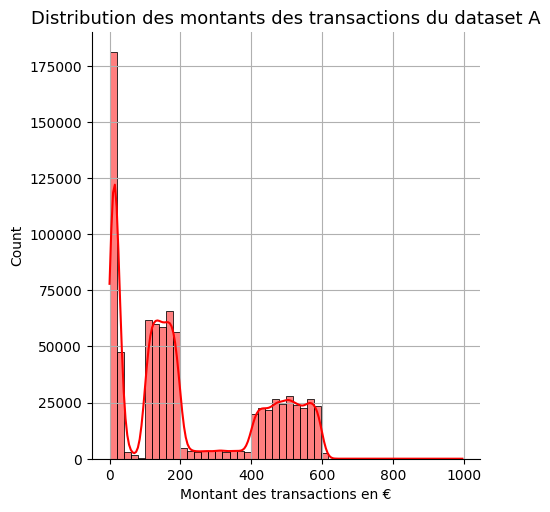

In [20]:
sns.displot(df_A[df_A['tx_amount']<1000]['tx_amount'], kde= True, color='red', bins=50)
plt.grid()
plt.title('Distribution des montants des transactions du dataset A', size= 13)
plt.xlabel('Montant des transactions en €')
plt.ylabel('Count')

Text(-21.180555555555557, 0.5, 'Count')

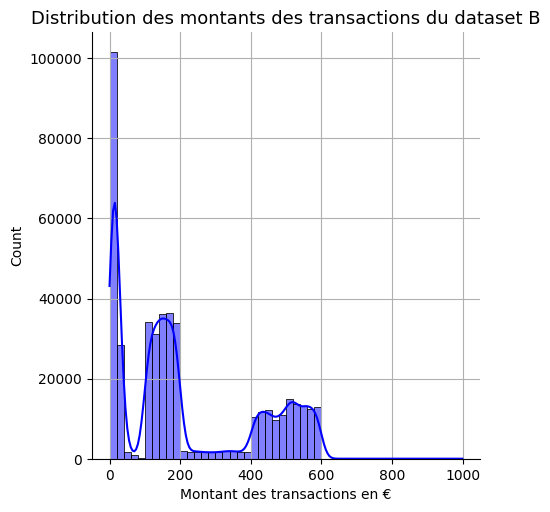

In [24]:
sns.displot(df_B[df_B['tx_amount']<1000]['tx_amount'], kde= True, color='blue', bins=50)
plt.grid()
plt.title('Distribution des montants des transactions du dataset B', size= 13)
plt.xlabel('Montant des transactions en €')
plt.ylabel('Count')

Text(-3.8055555555555554, 0.5, 'Count')

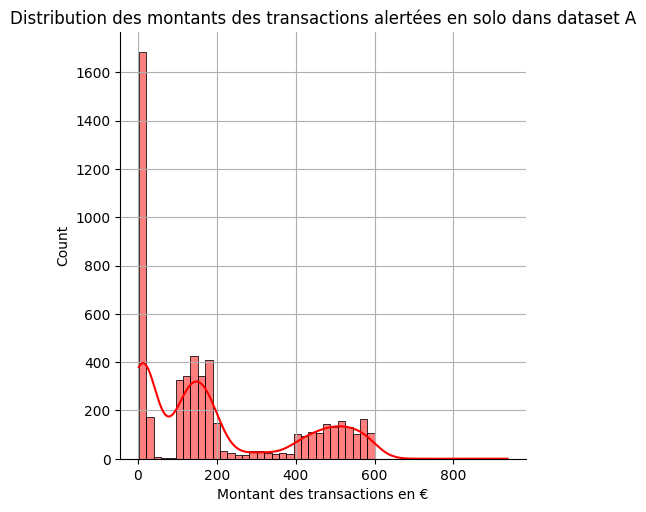

In [25]:
sns.displot(df_A[(df_A['is_alert_solo']==True)&(df_A['tx_amount']<1000)]['tx_amount'], kde=True, color='red', bins=50) 
plt.grid()
plt.title('Distribution des montants des transactions alertées en solo dans dataset A')
plt.xlabel('Montant des transactions en €')
plt.ylabel('Count')

Text(5.069444444444445, 0.5, 'Count')

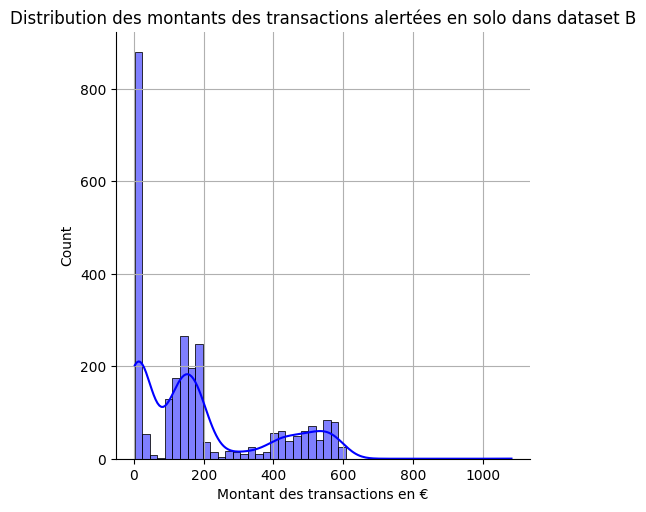

In [89]:
sns.displot(df_B[(df_B['is_alert_solo']==True)&(df_B['tx_amount']<1100)]['tx_amount'], kde=True, color='blue', bins=50) 
plt.grid()
plt.title('Distribution des montants des transactions alertées en solo dans dataset B')
plt.xlabel('Montant des transactions en €')
plt.ylabel('Count')

In [28]:
df_A[(df_A['is_alert_pooled']==True)].describe()

tx_id  sender_account_id  receiver_account_id    tx_amount  \
count  1.040000e+03         650.000000           652.000000  1040.000000   
mean   6.558515e+05        6608.726154          6407.785276     9.820125   
std    3.851268e+05        2937.867002          2998.098573     5.829639   
min    9.490000e+02         153.000000            91.000000     2.540000   
25%    3.109048e+05        4272.750000          3727.500000     3.805000   
50%    6.038490e+05        7357.500000          7202.000000    10.640000   
75%    1.014375e+06        9342.500000          9345.000000    15.270000   
max    1.317852e+06        9993.000000          9993.000000    19.920000   

       sender_zip_code  receiver_zip_code  
count      1040.000000        1040.000000  
mean      45548.664423       45530.421154  
std       25981.916791       26395.231674  
min        1090.000000        1120.000000  
25%       23517.500000       24220.000000  
50%       45630.000000       43230.000000  
75%       65700.000000       67315.000000  
max       98828.000000       98828.000000

Text(4.944444444444445, 0.5, 'Count')

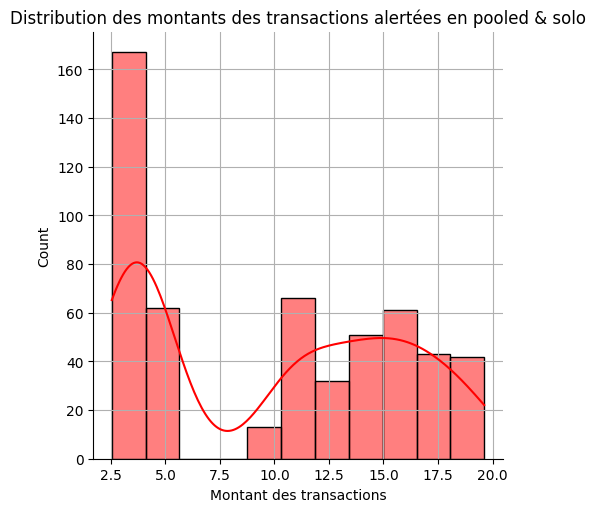

In [29]:
sns.displot(df_A[(df_A['is_alert_solo']==True)&(df_A['is_alert_pooled']==True)]['tx_amount'], kde=True, color='red') 
plt.grid()
plt.title('Distribution des montants des transactions alertées en pooled & solo')
plt.xlabel('Montant des transactions')
plt.ylabel('Count')

### Banques dans les transactions 

In [83]:
df_A["Banques_en_jeu"]= df_A["sender_bank_id"]+" - " + df_A["receiver_bank_id"]
df= df_A.groupby(by=["Banques_en_jeu"])["Banques_en_jeu"].agg(['count'])
df.sort_values('count', ascending= False, inplace=True)
df.reset_index(inplace=True)

df_B["Banques_en_jeu"]= df_B["sender_bank_id"]+" - " + df_B["receiver_bank_id"]
df2= df_B.groupby(by=["Banques_en_jeu"])["Banques_en_jeu"].agg(['count'])
df2.sort_values('count', ascending= False, inplace=True)
df2.reset_index(inplace=True)

In [84]:
df2

Banques_en_jeu   count
0          B - A  109425
1          A - B  103224
2          C - B  100252
3          B - C   90585
4          B - B   54580

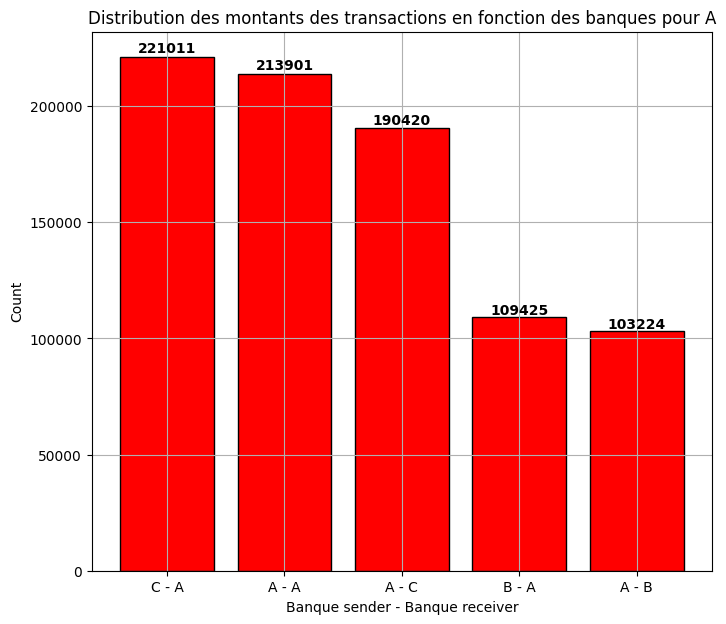

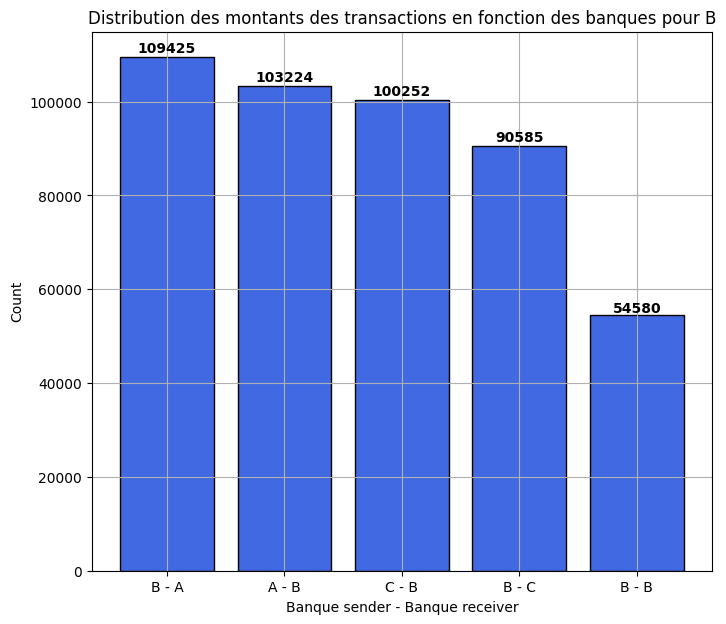

In [91]:
fig, ax = plt.subplots(figsize=(8,7))
rects1= ax.bar(df["Banques_en_jeu"], df["count"], label='Banques dans les transactions',
                color='red', edgecolor = "black")
#ax.set_ylabel("Revenu moyen des films", labelpad=5, fontsize=12)
plt.grid()
plt.title('Distribution des montants des transactions en fonction des banques pour A')
plt.xlabel('Banque sender - Banque receiver')
plt.ylabel('Count')

i=0
for p in rects1:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(df['count'][i]),
             ha='center',
             weight='bold')
    i+=1

fig, ax = plt.subplots(figsize=(8,7))
rects2= ax.bar(df2["Banques_en_jeu"], df2["count"], label='Banques dans les transactions',
                color='royalblue', edgecolor = "black")
#ax.set_ylabel("Revenu moyen des films", labelpad=5, fontsize=12)
plt.grid()
plt.title('Distribution des montants des transactions en fonction des banques pour B')
plt.xlabel('Banque sender - Banque receiver')
plt.ylabel('Count')

i=0
for p in rects2:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(df2['count'][i]),
             ha='center',
             weight='bold')
    i+=1

Toutes les transactions qui sont labellisées ALERT en pooled sont des transactions dont le montant est inférieur à 20 €. 
Ainsi les transactions qui sont labellisées ALERT en pooled et en solo sont des transactions également inférieure à ce montant. 

In [30]:
df_A.dtypes

tx_id                             int64
sender_account_id               float64
receiver_account_id             float64
tx_amount                       float64
timestamp                datetime64[ns]
tx_type                          object
sender_bank_id                   object
sender_first_name                object
sender_last_name                 object
sender_country_code              object
sender_birth_date        datetime64[ns]
sender_zip_code                   int64
receiver_bank_id                 object
receiver_first_name              object
receiver_last_name               object
receiver_country_code            object
receiver_birth_date      datetime64[ns]
receiver_zip_code                 int64
is_alert_solo                      bool
is_alert_pooled                    bool
is_both_alert                      bool
dtype: object

In [93]:
df_A['timestamp'] = pd.to_datetime(df_A.timestamp, format='%Y-%m-%d', errors = 'ignore')
df_A['sender_birth_date'] = pd.to_datetime(df_A.sender_birth_date, format='%Y-%m-%d', errors = 'ignore')
df_A['receiver_birth_date'] = pd.to_datetime(df_A.receiver_birth_date, format='%Y-%m-%d', errors = 'ignore')

df_B['timestamp2'] = pd.to_datetime(df_B.timestamp, format='%Y-%m-%d', errors = 'ignore')
df_B['sender_birth_date'] = pd.to_datetime(df_B.sender_birth_date, format='%Y-%m-%d', errors = 'ignore')
df_B['receiver_birth_date'] = pd.to_datetime(df_B.receiver_birth_date, format='%Y-%m-%d', errors = 'ignore')

In [32]:
df_A

tx_id  sender_account_id  receiver_account_id  tx_amount  timestamp  \
0          3109             6822.0                  NaN     229.97 2018-03-03   
1          1829                NaN               9011.0     117.83 2018-03-03   
2          1830                NaN               7140.0     117.83 2018-03-03   
3          1831                NaN               1822.0     526.02 2018-03-03   
4          1832             5390.0                  NaN      35.79 2018-03-03   
...         ...                ...                  ...        ...        ...   
837976  1320127             4521.0               8882.0     462.04 2021-12-25   
837977  1317252             5083.0                  NaN      11.68 2021-12-25   
837978  1322052             9771.0                  NaN     189.02 2021-12-25   
837979  1317047                NaN               9832.0      11.96 2021-12-25   
837980  1318380                NaN               7233.0     179.27 2021-12-25   

       tx_type sender_bank_id sender_first_name sender_last_name  \
0         WIRE              A             Marie              Lee   
1         WIRE              B              Kurt          Brignac   
2         WIRE              B              Kurt          Brignac   
3         WIRE              C            Shelly           Jethva   
4         WIRE              A              Judy            James   
...        ...            ...               ...              ...   
837976    WIRE              A             James            Laday   
837977    WIRE              A            Johnny           Miller   
837978   CHECK              A              Alan        Mccormick   
837979    WIRE              C             Sally           Simmon   
837980    WIRE              C            Daniel          Arledge   

       sender_country_code  ... sender_zip_code  receiver_bank_id  \
0                       FR  ...           27800                 C   
1                       FR  ...           35660                 A   
2                       FR  ...           35660                 A   
3                       CN  ...           65230                 A   
4                       FR  ...           42140                 C   
...                    ...  ...             ...               ...   
837976                  FR  ...           53240                 A   
837977                  FR  ...           27230                 B   
837978                  FR  ...            6340                 C   
837979                  FR  ...           80290                 A   
837980                  FR  ...            7270                 A   

       receiver_first_name receiver_last_name receiver_country_code  \
0                   Maritn            Alvarez                    FR   
1                   Joseph              Gable                    FR   
2                  Shelley            Spencer                    FR   
3                  Ambrose               Cole                    FR   
4                     Jose              Fiume                    FR   
...                    ...                ...                   ...   
837976             Richard            Linkous                    FR   
837977                Ruth            Cuadras                    FR   
837978                 Van            Johnson                    FR   
837979             Richard              Wynne                    FR   
837980             Lynelle              Bonar                    FR   

       receiver_birth_date receiver_zip_code  is_alert_solo  is_alert_pooled  \
0               1930-08-29             89160          False            False   
1               1933-12-23             62116          False            False   
2               1944-12-23             34360          False            False   
3               1958-04-07              3800          False            False   
4               1981-08-28             66820          False            False   
...                    ...               ...            ..

In [105]:
len(df_A["timestamp"].drop_duplicates())

200

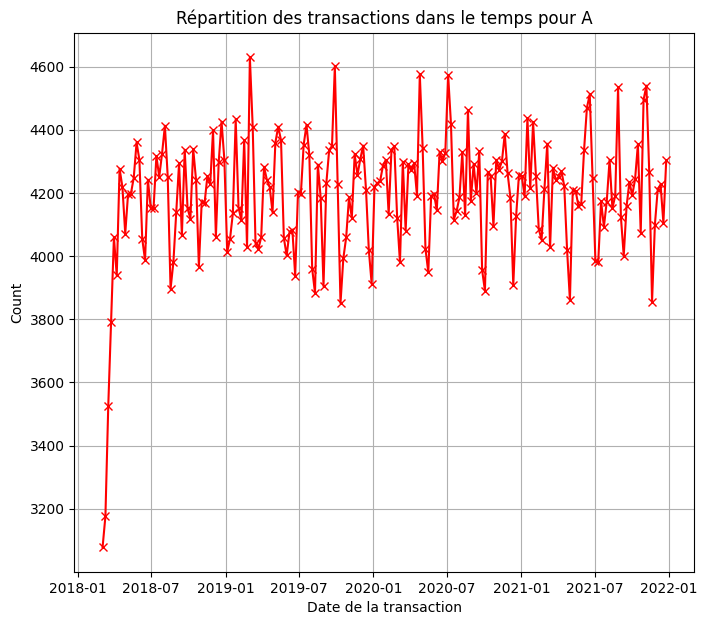

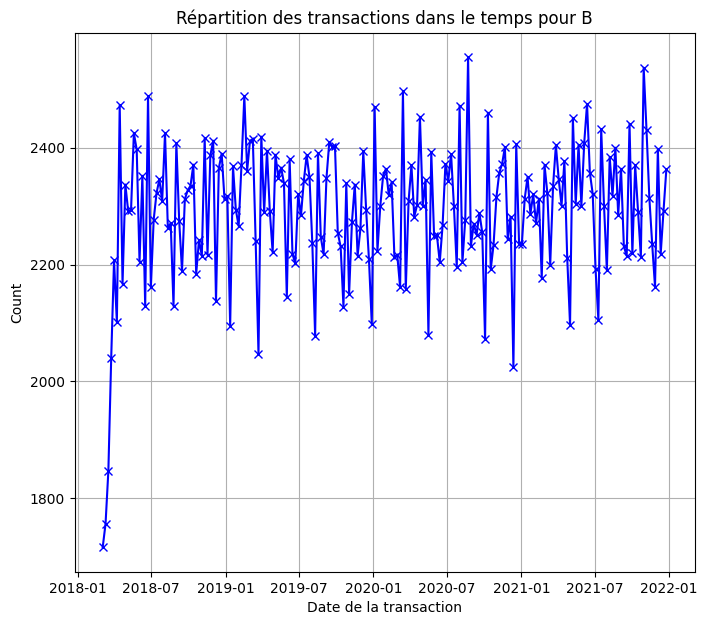

In [118]:
fig, ax = plt.subplots(figsize=(8,7))
rects1= ax.plot(df_A["timestamp"].drop_duplicates(), df_A.groupby(['timestamp'])['timestamp'].agg('count'), 'rx-' )
#ax.set_ylabel("Revenu moyen des films", labelpad=5, fontsize=12)
#plt.grid()
plt.title('Répartition des transactions dans le temps pour A')
plt.xlabel('Date de la transaction')
plt.ylabel('Count')
plt.grid()

fig, ax = plt.subplots(figsize=(8,7))
rects1= ax.plot(df_B["timestamp2"].drop_duplicates(), df_B.groupby(['timestamp2'])['timestamp2'].agg('count'), 'bx-' )
#ax.set_ylabel("Revenu moyen des films", labelpad=5, fontsize=12)
#plt.grid()
plt.title('Répartition des transactions dans le temps pour B')
plt.xlabel('Date de la transaction')
plt.ylabel('Count')
plt.grid()

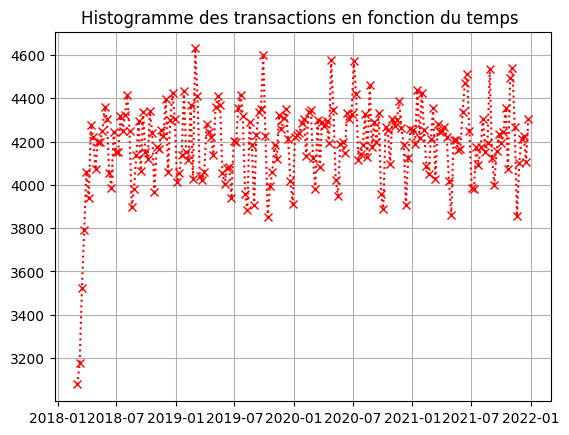

In [26]:
x = df_A.timestamp2.unique()
#date
y = df_A.groupby('timestamp2')['timestamp2'].count()
#revenue moyen 




fig, ax = plt.subplots()
ax.plot(x, y, 'rx:')
#plt.legend('Revenue', 'Budget')
plt.title('Histogramme des transactions en fonction du temps ')
plt.grid()
plt.show()

In [27]:
df_A['month']=df_A['timestamp2'].dt.month 
df_A['day']=df_A['timestamp2'].dt.day 
df_A.dtypes

tx_id                             int64
sender_account_id               float64
receiver_account_id             float64
tx_amount                       float64
timestamp                        object
tx_type                          object
sender_bank_id                   object
sender_first_name                object
sender_last_name                 object
sender_country_code              object
sender_birth_date        datetime64[ns]
sender_zip_code                   int64
receiver_bank_id                 object
receiver_first_name              object
receiver_last_name               object
receiver_country_code            object
receiver_birth_date      datetime64[ns]
receiver_zip_code                 int64
is_alert_solo                      bool
is_alert_pooled                    bool
is_both_alert                      bool
timestamp2               datetime64[ns]
month                             int64
day                               int64
dtype: object

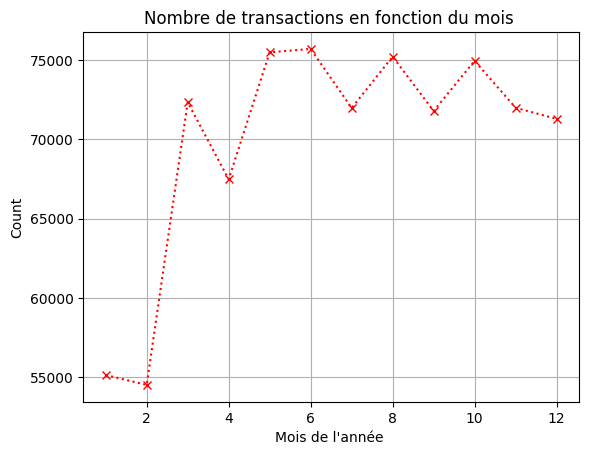

In [28]:
x = np.sort(df_A.month.unique())
#date
y = df_A.groupby('month')['month'].count()
#count 




fig, ax = plt.subplots()
ax.plot(x, y, 'rx:')
#plt.legend('Revenue', 'Budget')
plt.title('Nombre de transactions en fonction du mois ')
plt.xlabel("Mois de l'année ") 
plt.ylabel("Count")
plt.grid()
plt.show()

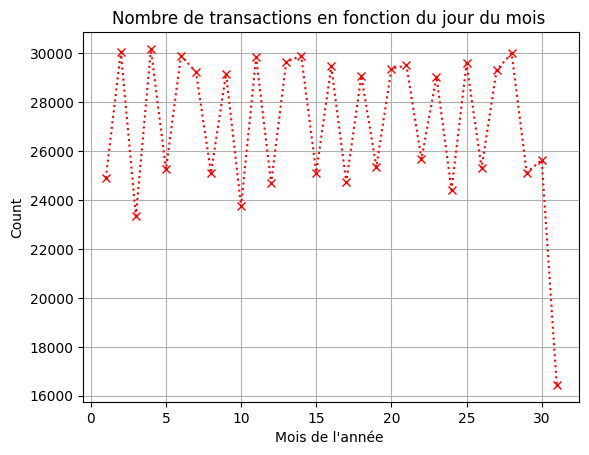

In [29]:
x = np.sort(df_A.day.unique())
#date
y = df_A.groupby('day')['day'].count()
#count 




fig, ax = plt.subplots()
ax.plot(x, y, 'rx:')
#plt.legend('Revenue', 'Budget')
plt.title('Nombre de transactions en fonction du jour du mois ')
plt.xlabel("Mois de l'année ") 
plt.ylabel("Count")
plt.grid()
plt.show()

In [30]:
df_A['entite']='A'
df_B['entite']='B'

In [31]:
df_A.head(5)

tx_id  sender_account_id  receiver_account_id  tx_amount   timestamp  \
0   3109             6822.0                  NaN     229.97  2018-03-03   
1   1829                NaN               9011.0     117.83  2018-03-03   
2   1830                NaN               7140.0     117.83  2018-03-03   
3   1831                NaN               1822.0     526.02  2018-03-03   
4   1832             5390.0                  NaN      35.79  2018-03-03   

  tx_type sender_bank_id sender_first_name sender_last_name  \
0    WIRE              A             Marie              Lee   
1    WIRE              B              Kurt          Brignac   
2    WIRE              B              Kurt          Brignac   
3    WIRE              C            Shelly           Jethva   
4    WIRE              A              Judy            James   

  sender_country_code  ... receiver_country_code  receiver_birth_date  \
0                  FR  ...                    FR           1930-08-29   
1                  FR  ...                    FR           1933-12-23   
2                  FR  ...                    FR           1944-12-23   
3                  CN  ...                    FR           1958-04-07   
4                  FR  ...                    FR           1981-08-28   

  receiver_zip_code is_alert_solo is_alert_pooled is_both_alert timestamp2  \
0             89160         False           False         False 2018-03-03   
1             62116         False           False         False 2018-03-03   
2             34360         False           False         False 2018-03-03   
3              3800         False           False         False 2018-03-03   
4             66820         False           False         False 2018-03-03   

   month  day  entite  
0      3    3       A  
1      3    3       A  
2      3    3       A  
3      3    3       A  
4      3    3       A  

[5 rows x 25 columns]

In [32]:
df_B.head(5)

tx_id  sender_account_id  receiver_account_id  tx_amount   timestamp  \
0   1364                NaN                595.0     129.41  2018-03-03   
1   4318              785.0               8854.0     129.66  2018-03-03   
2   4319              785.0                  NaN     129.66  2018-03-03   
3   2549             7795.0                  NaN     189.25  2018-03-03   
4   4320              785.0                  NaN     129.66  2018-03-03   

  tx_type sender_bank_id sender_first_name sender_last_name  \
0    WIRE              C          Jonathan            Smith   
1    WIRE              B             Harry           Alfano   
2    WIRE              B             Harry           Alfano   
3    WIRE              B              Mark          Sauders   
4    WIRE              B             Harry           Alfano   

  sender_country_code  ... receiver_bank_id  receiver_first_name  \
0                  FR  ...                B              Shannon   
1                  FR  ...                B                 John   
2                  FR  ...                A                Jason   
3                  FR  ...                C             Nicholas   
4                  FR  ...                A           Wilhelmina   

  receiver_last_name receiver_country_code receiver_birth_date  \
0             Bailey                    FR          1973-06-02   
1             Adkins                    FR          1958-11-07   
2          Arsenault                    FR          1935-03-03   
3             Omersa                    FR          1921-06-29   
4          Eberhardt                    FR          1941-04-25   

  receiver_zip_code is_alert_solo  is_alert_pooled  timestamp2  entite  
0             54210         False            False  2018-03-03       B  
1             20171         False            False  2018-03-03       B  
2             51240         False            False  2018-03-03       B  
3             36290         False            False  2018-03-03       B  
4             77440         False            False  2018-03-03       B  

[5 rows x 22 columns]

In [33]:
DF=pd.concat([df_A,df_B])

In [34]:
DF

tx_id  sender_account_id  receiver_account_id  tx_amount  \
0          3109             6822.0                  NaN     229.97   
1          1829                NaN               9011.0     117.83   
2          1830                NaN               7140.0     117.83   
3          1831                NaN               1822.0     526.02   
4          1832             5390.0                  NaN      35.79   
...         ...                ...                  ...        ...   
458061  1317989             2784.0               1624.0     163.36   
458062  1322199                NaN               1834.0      10.45   
458063  1322359                NaN               9145.0     513.78   
458064  1317568             5624.0               4994.0     109.41   
458065  1319710             9694.0               9795.0     105.93   

         timestamp tx_type sender_bank_id sender_first_name sender_last_name  \
0       2018-03-03    WIRE              A             Marie              Lee   
1       2018-03-03    WIRE              B              Kurt          Brignac   
2       2018-03-03    WIRE              B              Kurt          Brignac   
3       2018-03-03    WIRE              C            Shelly           Jethva   
4       2018-03-03    WIRE              A              Judy            James   
...            ...     ...            ...               ...              ...   
458061  2021-12-25    WIRE              B             Jason         Scarlato   
458062  2021-12-25   CHECK              C            Walter          Gabriel   
458063  2021-12-25    WIRE              A              Sean             Dunn   
458064  2021-12-25    WIRE              B             Molly             Rady   
458065  2021-12-25    WIRE              B              Mary          Camacho   

       sender_country_code  ... receiver_country_code  receiver_birth_date  \
0                       FR  ...                    FR           1930-08-29   
1                       FR  ...                    FR           1933-12-23   
2                       FR  ...                    FR           1944-12-23   
3                       CN  ...                    FR           1958-04-07   
4                       FR  ...                    FR           1981-08-28   
...                    ...  ...                   ...                  ...   
458061                  FR  ...                    FR           1964-06-16   
458062                  HU  ...                    FR           1925-05-02   
458063                  FR  ...                    FR           1956-04-07   
458064                  FR  ...                    FR           1928-03-01   
458065                  FR  ...                    FR           1931-03-11   

       receiver_zip_code is_alert_solo is_alert_pooled is_both_alert  \
0                  89160         False           False         False   
1                  62116         False           False         False   
2                  34360         False           False         False   
3                   3800         False           False         False   
4                  66820         False           False         False   
...                  ...           ...             ...           ...   
458061             82340         False           False           NaN   
458062             77133         False           False           NaN   
458063              7000         False           False           NaN   
458064             10140         False           False           NaN   
458065             85320         False           False           NaN   

       timestamp2  month  day  entite  
0      2018-03-03    3.0  3.0       A  
1      2018-03-03    3.0  3.0       A  
2      2018-03-03    3.0  3.0       A  
3      2018-03-03    3.0  3.0       A  
4      2018-03-03    3.0  3.0       A  
...           ...    ...  ...     ...  
458061 2021-12-25    NaN  NaN       B  
458062 2021-12-25    NaN  NaN       B  
458063 2021-12-25    NaN  NaN       B  
458064

### Levenshtein Distance 

In [35]:
s1='beenitu'
s2='hello'

def dist_Levenshtein(s1,s2):
    m=np.zeros((len(s1),len(s2)))
    for i in range(len(s1)):
        m[i,0]=i
    for j in range(len(s2)):
        m[0,j]=j
    for i in range(1,len(s1)):
        for j in range(1,len(s2)):
            if s1[i]==s2[j]:
                a=0
            else:
                a=1
            
            m[i,j]=min(m[i-1,j-1]+a, m[i-1,j]+1,m[i,j-1]+1)
            
    return(m[-1,-1])

    

In [36]:
dist_Levenshtein(s1,s2)

5.0

### Brute force algorithm for approximate string matching

In [37]:
T=['been','bid','moon','sun','star']

def brute_force(N,T,q):
    Liste_strings=[]
    Liste_distance=[]
    for i in range(N):
        Liste_strings.append(T[i])
        Liste_distance.append(dist_Levenshtein(T[i],q))
    df=pd.DataFrame({'strings': Liste_strings ,
                     'distance': Liste_distance })
    
    df.sort_values(by='distance', ascending=True, inplace=True)
    
    return(df)



In [38]:
q='seen'

brute_force(3,T,q)

strings  distance
0    been       0.0
2    moon       2.0
1     bid       3.0

In [39]:
df_A.tx_id.count()

837981

### On va regarder, à l'aide de la clé primaire quelles sont les lignes en commun entre les 2 dataframes

In [44]:
L1 = list(df_A['tx_id'].values) 
L2 = list(df_B['tx_id'].values)

print( " Le nombre de tx communes aux 2 dataframes est de " + str(np.isin(L1,L2).astype(int).sum()))

 Le nombre de tx communes aux 2 dataframes est de 212649


In [45]:
df_A.head(3)

tx_id  sender_account_id  receiver_account_id  tx_amount   timestamp  \
0   3109             6822.0                  NaN     229.97  2018-03-03   
1   1829                NaN               9011.0     117.83  2018-03-03   
2   1830                NaN               7140.0     117.83  2018-03-03   

  tx_type sender_bank_id sender_first_name sender_last_name  \
0    WIRE              A             Marie              Lee   
1    WIRE              B              Kurt          Brignac   
2    WIRE              B              Kurt          Brignac   

  sender_country_code  ... receiver_country_code  receiver_birth_date  \
0                  FR  ...                    FR           1930-08-29   
1                  FR  ...                    FR           1933-12-23   
2                  FR  ...                    FR           1944-12-23   

  receiver_zip_code is_alert_solo is_alert_pooled is_both_alert timestamp2  \
0             89160         False           False         False 2018-03-03   
1             62116         False           False         False 2018-03-03   
2             34360         False           False         False 2018-03-03   

   month  day  entite  
0      3    3       A  
1      3    3       A  
2      3    3       A  

[3 rows x 25 columns]

# Oracle 

In [41]:
def Oracle(df1,df2, df_merge):
    "Cette fonction a pour but d'évaluer la qualité du pooling" 
    
    "Premièrement on va regarder la longueur des deux df"
    
    #Vrai nombre de tx si le pooling était parfait
    
    L1 = list(df1['tx_id'].values) 
    L2 = list(df2['tx_id'].values)
    
    Nb_tx_en_commun = np.isin(L1,L2).astype(int).sum()
    
    df_intermediaire = pd.DataFrame(np.isin(L1,L2).astype(int)*np.array(L1), columns=['Doublons'])
    Liste_tx_en_commun =  df_intermediaire[df_intermediaire.Doublons >0]

    
    #Le nombre que l'on trouve après pooling
    
    tx_merge_nb = len(df_merge['tx_id'].unique())  #nombre de transactions uniques dans le df_merge
    
   
    
    print(" Vrai nombre de tx si le pooling était parfait : " + str(Nb_tx_en_commun))
    print(" Nombre de tx après pooling  : " + str(tx_merge_nb))
    
    
    "Ensuite on va regarder la qualité du matching, i.e. si les lignes du dfA qui ont été matchées avec celle du dfB"
    "correspondent effectivement aux mêmes transactions"
    
    
    return()
     

# Base de données clients 

## On commence par constituer la base de clients sur le df_A 

In [3]:
df_base_client1 = df_A[['sender_first_name','sender_last_name','sender_birth_date']].copy()
df_base_client2 = df_A[['receiver_first_name','receiver_last_name','receiver_birth_date']].copy()

df_base_client1.head(3)

df_base_client1.drop_duplicates(keep = 'first', inplace=True)
df_base_client2.drop_duplicates(keep = 'first', inplace=True)

df_base_client1.rename(columns = {'sender_first_name': 'First_name', 'sender_last_name': 'Last_name',
                                 'sender_birth_date' : 'birth_date'},
                       inplace=True)
df_base_client2.rename(columns = {'receiver_first_name': 'First_name', 'receiver_last_name': 'Last_name',
                                 'receiver_birth_date' : 'birth_date'},
                       inplace=True)

df_base_client1.sort_values(by=['First_name', 'Last_name'],inplace=True)
df_base_client2.sort_values(by=['First_name', 'Last_name'],inplace=True)

df_base_client= pd.concat([df_base_client1,df_base_client2])
df_base_client.drop_duplicates(keep = 'first', inplace=True)
#df_base_client.head(3)

df_gpb =pd.DataFrame(df_A.groupby(by=['sender_first_name','sender_last_name','sender_birth_date'])['tx_amount'].agg(['count','mean', 'median','var']))
df_gpb.reset_index(inplace=True)
df_gpb.rename(columns = {'sender_first_name': 'First_name', 'sender_last_name': 'Last_name',
                                 'sender_birth_date' : 'birth_date',
                        'count': 'nb_tx_sent_A', 'mean': 'tx_sent_mean_A',
                        'median': 'tx_sent_med_A','var': 'variance_tx_sent_A'}, inplace=True)

df_alert =pd.DataFrame(df_A.groupby(by=['sender_first_name','sender_last_name','sender_birth_date'])['is_alert_solo'].agg(['sum']))
df_alert.reset_index(inplace=True)
df_alert.rename(columns = {'sender_first_name': 'First_name', 'sender_last_name': 'Last_name',
                                 'sender_birth_date' : 'birth_date',
                        'sum': 'nb_tx_sent_alert_solo_A'}, inplace=True)

df_base_client1.reset_index(inplace=True)
df_base_client1 = df_base_client1.drop(['index'], axis=1, inplace = False)

df_base_client1_bis = pd.merge(df_base_client1,df_gpb ,on=['First_name','Last_name','birth_date'] )
df_base_client1_ter = pd.merge(df_base_client1_bis,df_alert ,on=['First_name','Last_name','birth_date'] )

df_gpb =pd.DataFrame(df_A.groupby(by=['receiver_first_name','receiver_last_name','receiver_birth_date'])['tx_amount'].agg(['count','mean', 'median','var']))
df_gpb.reset_index(inplace=True)
df_gpb.rename(columns = {'receiver_first_name': 'First_name', 'receiver_last_name': 'Last_name',
                                 'receiver_birth_date' : 'birth_date',
                        'count': 'nb_tx_received_A', 'mean': 'tx_received_mean_A',
                        'median': 'tx_received_med_A', 'var': 'variance_tx_received_A'}, inplace=True)

df_alert =pd.DataFrame(df_A.groupby(by=['receiver_first_name','receiver_last_name','receiver_birth_date'])['is_alert_solo'].agg(['sum']))
df_alert.reset_index(inplace=True)
df_alert.rename(columns = {'receiver_first_name': 'First_name', 'receiver_last_name': 'Last_name',
                                 'receiver_birth_date' : 'birth_date',
                        'sum': 'nb_tx_received_alert_solo_A'}, inplace=True)

df_base_client2.reset_index(inplace=True)
df_base_client2 = df_base_client2.drop(['index'], axis=1, inplace = False)

df_base_client2_bis = pd.merge(df_base_client2,df_gpb ,on=['First_name','Last_name','birth_date'] )
df_base_client2_ter = pd.merge(df_base_client2_bis,df_alert ,on=['First_name','Last_name','birth_date'] )

DF_base_clients_A = pd.merge(df_base_client1_ter,df_base_client2_ter, on=['First_name','Last_name','birth_date'], how='outer')

DF_base_clients_A['nb_tx_all_A']=DF_base_clients_A.nb_tx_sent_A + DF_base_clients_A.nb_tx_received_A
DF_base_clients_A['nb_tx_alert_solo_all_A']=DF_base_clients_A.nb_tx_sent_alert_solo_A + DF_base_clients_A.nb_tx_received_alert_solo_A
#Métrique de confiance de l'individu
DF_base_clients_A['reliability_receiver_A']= 1- DF_base_clients_A['nb_tx_received_alert_solo_A']/DF_base_clients_A['nb_tx_received_A']
DF_base_clients_A['reliability_sent_A']= 1- DF_base_clients_A['nb_tx_sent_alert_solo_A']/DF_base_clients_A['nb_tx_sent_A']
DF_base_clients_A['reliability_all_A']= 1- DF_base_clients_A['nb_tx_alert_solo_all_A']/DF_base_clients_A['nb_tx_all_A']
DF_base_clients_A

First_name Last_name  birth_date  nb_tx_sent_A  tx_sent_mean_A  \
0         Aaron  Behrmann  1955-07-05         171.0    5.866100e+02   
1         Aaron   Coatney  1957-11-29          20.0    1.833900e+02   
2         Aaron     Davis  1947-09-15         169.0    4.379800e+02   
3         Aaron    Gaskin  1942-04-25          19.0    1.285646e+06   
4         Aaron    Lykins  1964-11-06          20.0    2.866700e+02   
...         ...       ...         ...           ...             ...   
9772    William    Tucker  1925-10-31           NaN             NaN   
9773     Willis  Saunders  1945-09-06           NaN             NaN   
9774       Ying  Blackmon  1987-02-28           NaN             NaN   
9775     Yvonne    Howard  1939-07-16           NaN             NaN   
9776      Zonia     Bucci  1955-11-23           NaN             NaN   

      tx_sent_med_A  variance_tx_sent_A  nb_tx_sent_alert_solo_A  \
0            586.61        0.000000e+00                      5.0   
1            183.39        0.000000e+00                      0.0   
2            437.98        0.000000e+00                      0.0   
3         114574.16        3.509760e+12                      0.0   
4            286.67        0.000000e+00                      0.0   
...             ...                 ...                      ...   
9772            NaN                 NaN                      NaN   
9773            NaN                 NaN                      NaN   
9774            NaN                 NaN                      NaN   
9775            NaN                 NaN                      NaN   
9776            NaN                 NaN                      NaN   

      nb_tx_received_A  tx_received_mean_A  tx_received_med_A  \
0                256.0        1.860258e+05            417.050   
1                  NaN                 NaN                NaN   
2                 51.0        1.088556e+06            215.750   
3                 36.0        4.306681e+05            109.500   
4                 38.0        1.705050e+02            170.505   
...                ...                 ...                ...   
9772              44.0        3.277345e+05            164.070   
9773             188.0        4.963039e+02            535.530   
9774              19.0        1.349700e+02            134.970   
9775              55.0        1.129082e+02            147.660   
9776              59.0        3.278231e+04            106.010   

      variance_tx_received_A  nb_tx_received_alert_solo_A  nb_tx_all_A  \
0               3.260005e+12                          0.0        427.0   
1                        NaN                          NaN          NaN   
2               1.817869e+13                          1.0        220.0   
3               6.575276e+12                          0.0         55.0   
4               7.534191e+01                          0.0         58.0   
...                      ...                          ...          ...   
9772            2.469403e+12                          0.0          NaN   
9773            1.922591e+04                          0.0          NaN   
9774            0.000000e+00                          0.0          NaN   
9775            4.009877e+03                          0.0          NaN   
9776            6.290305e+10                          0.0          NaN   

      nb_tx_alert_solo_all_A  reliability_receiver_A  reliability_sent_A  \
0                        5.0                1.000000             0.97076   
1                        NaN                     NaN             1.00000   
2                        1.0                0.980392             1.00000   
3                        0.0                1.000000             1.00000   
4                        0.0                1.000000             1.00000   
...                      ...                     ...                 ...   
9772                     NaN                1.000000                 NaN   
9773                     NaN                1.000000     

## On fait la même chose pour B 

In [4]:
"On fait la même chose pour df_B"

df_base_client1 = df_B[['sender_first_name','sender_last_name','sender_birth_date']].copy()
df_base_client2 = df_B[['receiver_first_name','receiver_last_name','receiver_birth_date']].copy()

df_base_client1.head(3)

df_base_client1.drop_duplicates(keep = 'first', inplace=True)
df_base_client2.drop_duplicates(keep = 'first', inplace=True)

df_base_client1.rename(columns = {'sender_first_name': 'First_name', 'sender_last_name': 'Last_name',
                                 'sender_birth_date' : 'birth_date'},
                       inplace=True)
df_base_client2.rename(columns = {'receiver_first_name': 'First_name', 'receiver_last_name': 'Last_name',
                                 'receiver_birth_date' : 'birth_date'},
                       inplace=True)

df_base_client1.sort_values(by=['First_name', 'Last_name'],inplace=True)
df_base_client2.sort_values(by=['First_name', 'Last_name'],inplace=True)

df_base_client= pd.concat([df_base_client1,df_base_client2])
df_base_client.drop_duplicates(keep = 'first', inplace=True)

df_gpb =pd.DataFrame(df_B.groupby(by=['sender_first_name','sender_last_name','sender_birth_date'])['tx_amount'].agg(['count','mean', 'median','var']))
df_gpb.reset_index(inplace=True)
df_gpb.rename(columns = {'sender_first_name': 'First_name', 'sender_last_name': 'Last_name',
                                 'sender_birth_date' : 'birth_date',
                        'count': 'nb_tx_sent_B', 'mean': 'tx_sent_mean_B',
                        'median': 'tx_sent_med_B', 'var': 'variance_tx_sent_B'}, inplace=True)

df_alert =pd.DataFrame(df_B.groupby(by=['sender_first_name','sender_last_name','sender_birth_date'])['is_alert_solo'].agg(['sum']))
df_alert.reset_index(inplace=True)
df_alert.rename(columns = {'sender_first_name': 'First_name', 'sender_last_name': 'Last_name',
                                 'sender_birth_date' : 'birth_date',
                        'sum': 'nb_tx_sent_alert_solo_B'}, inplace=True)

df_base_client1.reset_index(inplace=True)
df_base_client1 = df_base_client1.drop(['index'], axis=1, inplace = False)

df_base_client1_bis = pd.merge(df_base_client1,df_gpb ,on=['First_name','Last_name','birth_date'] )
df_base_client1_ter = pd.merge(df_base_client1_bis,df_alert ,on=['First_name','Last_name','birth_date'] )

df_gpb =pd.DataFrame(df_B.groupby(by=['receiver_first_name','receiver_last_name','receiver_birth_date'])['tx_amount'].agg(['count','mean', 'median','var']))
df_gpb.reset_index(inplace=True)
df_gpb.rename(columns = {'receiver_first_name': 'First_name', 'receiver_last_name': 'Last_name',
                                 'receiver_birth_date' : 'birth_date',
                        'count': 'nb_tx_received_B', 'mean': 'tx_received_mean_B',
                        'median': 'tx_received_med_B', 'var': 'variance_tx_received_B'}, inplace=True)

df_alert =pd.DataFrame(df_B.groupby(by=['receiver_first_name','receiver_last_name','receiver_birth_date'])['is_alert_solo'].agg(['sum']))
df_alert.reset_index(inplace=True)
df_alert.rename(columns = {'receiver_first_name': 'First_name', 'receiver_last_name': 'Last_name',
                                 'receiver_birth_date' : 'birth_date',
                        'sum': 'nb_tx_received_alert_solo_B'}, inplace=True)

df_base_client2.reset_index(inplace=True)
df_base_client2 = df_base_client2.drop(['index'], axis=1, inplace = False)

df_base_client2_bis = pd.merge(df_base_client2,df_gpb ,on=['First_name','Last_name','birth_date'] )
df_base_client2_ter = pd.merge(df_base_client2_bis,df_alert ,on=['First_name','Last_name','birth_date'] )

DF_base_clients_B = pd.merge(df_base_client1_ter,df_base_client2_ter, on=['First_name','Last_name','birth_date'], how='outer')

DF_base_clients_B['nb_tx_all_B']=DF_base_clients_B.nb_tx_sent_B + DF_base_clients_B.nb_tx_received_B
DF_base_clients_B['nb_tx_alert_solo_all_B']=DF_base_clients_B.nb_tx_sent_alert_solo_B + DF_base_clients_B.nb_tx_received_alert_solo_B
#Métrique de confiance de l'individu
DF_base_clients_B['reliability_receiver_B']= 1- DF_base_clients_B['nb_tx_received_alert_solo_B']/DF_base_clients_B['nb_tx_received_B']
DF_base_clients_B['reliability_sent_B']= 1- DF_base_clients_B['nb_tx_sent_alert_solo_B']/DF_base_clients_B['nb_tx_sent_B']
DF_base_clients_B['reliability_all_B']= 1- DF_base_clients_B['nb_tx_alert_solo_all_B']/DF_base_clients_B['nb_tx_all_B']
DF_base_clients_B

First_name Last_name  birth_date  nb_tx_sent_B  tx_sent_mean_B  \
0         Aaron   Coatney  1957-11-29         174.0    1.833900e+02   
1         Aaron    Gaskin  1942-04-25           6.0    1.233644e+06   
2         Aaron     Grubb  1962-02-23          20.0    1.276800e+02   
3         Aaron  Martinez  1941-05-16         169.0    4.959500e+02   
4         Aaron      Rash  1967-03-21          15.0    1.783502e+06   
...         ...       ...         ...           ...             ...   
8756        Yuk  Kliebert  1945-12-20           NaN             NaN   
8757     Yvonne  Crawford  1973-04-16           NaN             NaN   
8758     Yvonne   Westley  1941-04-15           NaN             NaN   
8759      Zonia     Bucci  1955-11-23           NaN             NaN   
8760      Zulma   Steffan  1945-02-10           NaN             NaN   

      tx_sent_med_B  variance_tx_sent_B  nb_tx_sent_alert_solo_B  \
0           183.390        0.000000e+00                      1.0   
1         71893.455        3.420208e+12                      0.0   
2           127.680        0.000000e+00                      0.0   
3           495.950        0.000000e+00                      0.0   
4        213834.570        1.352206e+13                      0.0   
...             ...                 ...                      ...   
8756            NaN                 NaN                      NaN   
8757            NaN                 NaN                      NaN   
8758            NaN                 NaN                      NaN   
8759            NaN                 NaN                      NaN   
8760            NaN                 NaN                      NaN   

      nb_tx_received_B  tx_received_mean_B  tx_received_med_B  \
0                 86.0        3.359641e+05              36.35   
1                  NaN                 NaN                NaN   
2                  NaN                 NaN                NaN   
3                 24.0        1.904959e+06             143.66   
4                 64.0        3.588018e+05              19.05   
...                ...                 ...                ...   
8756              16.0        9.742463e+02              16.04   
8757               4.0        9.682648e+06         8565027.81   
8758              57.0        1.255012e+02             174.49   
8759              19.0        1.602500e+02             160.25   
8760              21.0        3.164681e+05             154.82   

      variance_tx_received_B  nb_tx_received_alert_solo_B  nb_tx_all_B  \
0               5.957497e+12                          0.0        260.0   
1                        NaN                          NaN          NaN   
2                        NaN                          NaN          NaN   
3               2.991695e+13                          0.0        193.0   
4               2.782158e+12                          0.0         79.0   
...                      ...                          ...          ...   
8756            1.469055e+07                          0.0          NaN   
8757            1.130437e+14                          0.0          NaN   
8758            6.296854e+03                          0.0          NaN   
8759            0.000000e+00                          0.0          NaN   
8760            2.101136e+12                          0.0          NaN   

      nb_tx_alert_solo_all_B  reliability_receiver_B  reliability_sent_B  \
0                        1.0                     1.0            0.994253   
1                        NaN                     NaN            1.000000   
2                        NaN                     NaN            1.000000   
3                        0.0                     1.0            1.000000   
4                        0.0                     1.0            1.000000   
...                      ...                     ...                 ...   
8756                     NaN                     1.0                 NaN   
8757                     NaN                     1.0     

# Partie : Modélisation 

# I- Enrichissement du dataset (par l'intermédiaire de la base de données clients) 

Dans un premier temps, on va réaliser la modélisation avec le df_merge grâce aux tx_id. 
Ensuite on fera exactement la même chose mais avec le df_merge grâce au pooling. 


In [2]:
df_A=pd.read_csv("transactions_A.csv")
df_B=pd.read_csv("transactions_B.csv")

## Question principale : que va apporter les informations de B à A ?

On analyse premièrement quelles informations supplémentaires obtient-on grâce aux 2 lignes. 
Pour cela, on récupère les tx_id présentes dans les 2 datasets et on regarde les 2 lignes correspondantes. 

In [5]:
# On accède à toutes les tx_id présentes dans les deux df
L1 = list(df_A['tx_id'].values) 
L2 = list(df_B['tx_id'].values)

L=np.isin(L1,L2).astype(int)*L1
L=L[L != 0]  #liste des transactions appartenant aux 2 datasets 

In [6]:
def analyse_de_tx(nb_tx):
    "permet de comparer deux lignes d'une même transaction"
    display(df_A[df_A['tx_id']==nb_tx])
    display(df_B[df_B['tx_id']==nb_tx])

In [7]:
analyse_de_tx(L[145667])

tx_id  sender_account_id  receiver_account_id  tx_amount   timestamp  \
573954  905797                NaN               1822.0     511.05  2020-10-17   

       tx_type sender_bank_id sender_first_name sender_last_name  \
573954    WIRE              B             Scott           Lawler   

       sender_country_code sender_birth_date  sender_zip_code  \
573954                  FR        1938-09-17            68740   

       receiver_bank_id receiver_first_name receiver_last_name  \
573954                A             Ambrose               Cole   

       receiver_country_code receiver_birth_date  receiver_zip_code  \
573954                    FR          1958-04-07               3800   

        is_alert_solo  is_alert_pooled  
573954          False            False

tx_id  sender_account_id  receiver_account_id  tx_amount   timestamp  \
314875  905797             4585.0                  NaN     511.05  2020-10-17   

       tx_type sender_bank_id sender_first_name sender_last_name  \
314875    WIRE              B             Scott           Lawler   

       sender_country_code sender_birth_date  sender_zip_code  \
314875                  FR        1938-09-17            68740   

       receiver_bank_id receiver_first_name receiver_last_name  \
314875                A             Ambrose               Cole   

       receiver_country_code receiver_birth_date  receiver_zip_code  \
314875                    FR          1958-04-07               3800   

        is_alert_solo  is_alert_pooled  
314875          False            False

Les 2 lignes sont équivalentes pour la plupart (totalité?) des transactions en commun. 
La seule différence est le sender_account_id ou le receiver_account_id qui n'ont pas réellement d'importance. 


#### ==> Une hypothèse que l'on peut formuler à ce stade est que la plus-value de merge les DF porte donc sur les clients ! 

## On va ajouter les informations clients (des deux bases de données A et B) au dataframe pour compléter notre dataset ! 

In [8]:
"On s'occupe du sender"

#Informations obtenue avec base clients A
df_A_bis =pd.merge(df_A, DF_base_clients_A[['First_name','Last_name','birth_date','nb_tx_sent_A','tx_sent_mean_A','tx_sent_med_A',
                                        'nb_tx_sent_alert_solo_A','nb_tx_all_A', 'nb_tx_alert_solo_all_A']]
               , left_on =['sender_first_name','sender_last_name','sender_birth_date']
               ,right_on =['First_name','Last_name','birth_date'], how='left').drop(['First_name','Last_name','birth_date'], axis=1)

#Informations obtenue avec base clients B
df_A_bis =pd.merge(df_A_bis, DF_base_clients_B[['First_name','Last_name','birth_date','nb_tx_sent_B','tx_sent_mean_B','tx_sent_med_B',
                                        'nb_tx_sent_alert_solo_B', 'nb_tx_all_B', 'nb_tx_alert_solo_all_B']]
               , left_on =['sender_first_name','sender_last_name','sender_birth_date']
               ,right_on =['First_name','Last_name','birth_date'], how='left').drop(['First_name','Last_name','birth_date'], axis=1)

"On s'occupe du receiver"

#Informations obtenue avec base clients A
df_A_bis =pd.merge(df_A_bis, DF_base_clients_A[['First_name','Last_name','birth_date','nb_tx_received_A', 'tx_received_mean_A'
                                                ,'tx_received_med_A','nb_tx_received_alert_solo_A', 'nb_tx_all_A'
                                                , 'nb_tx_alert_solo_all_A']]
               , left_on =['receiver_first_name','receiver_last_name','receiver_birth_date']
               ,right_on =['First_name','Last_name','birth_date']
            ,suffixes=('_sender','_receiver'), how='left'
              ).drop(['First_name','Last_name','birth_date'], axis=1)

#Informations obtenue avec base clients B
df_A_bis =pd.merge(df_A_bis, DF_base_clients_B[['First_name','Last_name','birth_date','nb_tx_received_B', 'tx_received_mean_B'
                                                ,'tx_received_med_B','nb_tx_received_alert_solo_B', 'nb_tx_all_B'
                                                , 'nb_tx_alert_solo_all_B']]
               , left_on =['receiver_first_name','receiver_last_name','receiver_birth_date']
               ,right_on =['First_name','Last_name','birth_date']
              ,suffixes=('_sender','_receiver'), how='left').drop(['First_name','Last_name','birth_date'], axis=1)



df_A_bis.drop(['sender_account_id','receiver_account_id'], inplace=True, axis=1)
df_A_bis.head(5)

tx_id  tx_amount   timestamp tx_type sender_bank_id sender_first_name  \
0   3109     229.97  2018-03-03    WIRE              A             Marie   
1   1829     117.83  2018-03-03    WIRE              B              Kurt   
2   1830     117.83  2018-03-03    WIRE              B              Kurt   
3   1831     526.02  2018-03-03    WIRE              C            Shelly   
4   1832      35.79  2018-03-03    WIRE              A              Judy   

  sender_last_name sender_country_code sender_birth_date  sender_zip_code  \
0              Lee                  FR        1937-08-23            27800   
1          Brignac                  FR        1962-09-07            35660   
2          Brignac                  FR        1962-09-07            35660   
3           Jethva                  CN        1961-06-29            65230   
4            James                  FR        1942-04-08            42140   

   ... tx_received_med_A nb_tx_received_alert_solo_A nb_tx_all_A_receiver  \
0  ...            418.89                         6.0                479.0   
1  ...             22.08                         0.0                528.0   
2  ...             67.35                         0.0                274.0   
3  ...            511.05                         0.0                754.0   
4  ...             20.37                         0.0                 57.0   

  nb_tx_alert_solo_all_A_receiver nb_tx_received_B  tx_received_mean_B  \
0                             9.0            251.0          383.468008   
1                             0.0             64.0           94.762500   
2                             0.0             20.0          117.830000   
3                             0.0            371.0         2913.308140   
4                             0.0              NaN                 NaN   

   tx_received_med_B  nb_tx_received_alert_solo_B  nb_tx_all_B_receiver  \
0             503.44                          1.0                 365.0   
1             117.83                          0.0                 150.0   
2             117.83                          0.0                  82.0   
3             511.05                          2.0                 386.0   
4                NaN                          NaN                   NaN   

   nb_tx_alert_solo_all_B_receiver  
0                              1.0  
1                              1.0  
2                              0.0  
3                              2.0  
4                              NaN  

[5 rows x 42 columns]

### On crée une métrique : fiabilité de l'individu qui vaut 1 si l'individu n'a jamais eu alert_solo

In [9]:
#Receiver
df_A_bis['reliability_receiver_A']= 1- df_A_bis['nb_tx_received_alert_solo_A']/df_A_bis['nb_tx_received_A']
df_A_bis['reliability_receiver_B']= 1- df_A_bis['nb_tx_received_alert_solo_B']/df_A_bis['nb_tx_received_B']

#Sender
df_A_bis['reliability_sender_A']= 1- df_A_bis['nb_tx_sent_alert_solo_A']/df_A_bis['nb_tx_sent_A']
df_A_bis['reliability_sender_B']= 1- df_A_bis['nb_tx_sent_alert_solo_B']/df_A_bis['nb_tx_sent_B']

In [10]:
df_merge= pd.merge(df_A_bis, df_B[['tx_id','is_alert_solo', 'is_alert_pooled']], on = ['tx_id'], how='inner', suffixes=('_A','_B'))
df_merge.drop(['is_alert_pooled_A'], axis=1, inplace=True)
df_merge.rename(columns = {'is_alert_pooled_B': 'is_alert_pooled'}, inplace=True)

display(df_merge.head(2))  
df_merge.columns

tx_id  tx_amount   timestamp tx_type sender_bank_id sender_first_name  \
0   1829     117.83  2018-03-03    WIRE              B              Kurt   
1   1830     117.83  2018-03-03    WIRE              B              Kurt   

  sender_last_name sender_country_code sender_birth_date  sender_zip_code  \
0          Brignac                  FR        1962-09-07            35660   
1          Brignac                  FR        1962-09-07            35660   

   ... tx_received_med_B nb_tx_received_alert_solo_B nb_tx_all_B_receiver  \
0  ...            117.83                         0.0                150.0   
1  ...            117.83                         0.0                 82.0   

  nb_tx_alert_solo_all_B_receiver reliability_receiver_A  \
0                             1.0                    1.0   
1                             0.0                    1.0   

   reliability_receiver_B  reliability_sender_A  reliability_sender_B  \
0                     1.0              0.983193                   1.0   
1                     1.0              0.983193                   1.0   

   is_alert_solo_B  is_alert_pooled  
0            False            False  
1            False            False  

[2 rows x 47 columns]

Index(['tx_id', 'tx_amount', 'timestamp', 'tx_type', 'sender_bank_id',
       'sender_first_name', 'sender_last_name', 'sender_country_code',
       'sender_birth_date', 'sender_zip_code', 'receiver_bank_id',
       'receiver_first_name', 'receiver_last_name', 'receiver_country_code',
       'receiver_birth_date', 'receiver_zip_code', 'is_alert_solo_A',
       'nb_tx_sent_A', 'tx_sent_mean_A', 'tx_sent_med_A',
       'nb_tx_sent_alert_solo_A', 'nb_tx_all_A_sender',
       'nb_tx_alert_solo_all_A_sender', 'nb_tx_sent_B', 'tx_sent_mean_B',
       'tx_sent_med_B', 'nb_tx_sent_alert_solo_B', 'nb_tx_all_B_sender',
       'nb_tx_alert_solo_all_B_sender', 'nb_tx_received_A',
       'tx_received_mean_A', 'tx_received_med_A',
       'nb_tx_received_alert_solo_A', 'nb_tx_all_A_receiver',
       'nb_tx_alert_solo_all_A_receiver', 'nb_tx_received_B',
       'tx_received_mean_B', 'tx_received_med_B',
       'nb_tx_received_alert_solo_B', 'nb_tx_all_B_receiver',
       'nb_tx_alert_solo_all_B_receiv

### On met les dates en datetime 

In [11]:
df_merge['timestamp'] = pd.to_datetime(df_merge.timestamp, format='%Y-%m-%d', errors = 'ignore')
df_merge['sender_birth_date'] = pd.to_datetime(df_merge.sender_birth_date, format='%Y-%m-%d', errors = 'ignore')
df_merge['receiver_birth_date'] = pd.to_datetime(df_merge.receiver_birth_date, format='%Y-%m-%d', errors = 'ignore')

#### On crée également des nouvelles features : 
- écart en % de tx_amount par rapport à la médiane de tx_amount pour un client 
- jour de l'année/ jour du mois 

In [12]:
#Écart
df_merge['ecarts_tx_received_A']= (df_merge.tx_amount - df_merge.tx_received_med_A)/df_merge.tx_received_med_A*100
df_merge['ecarts_tx_received_B']= (df_merge.tx_amount - df_merge.tx_received_med_B)/df_merge.tx_received_med_B*100
df_merge['ecarts_tx_sent_A']= (df_merge.tx_amount - df_merge.tx_sent_med_A)/df_merge.tx_sent_med_A*100
df_merge['ecarts_tx_sent_B']= (df_merge.tx_amount - df_merge.tx_sent_med_B)/df_merge.tx_sent_med_B*100

#Jours de l'année/du mois 
df_merge['jour_année_tx']=df_merge['timestamp'].dt.dayofyear
df_merge['jour_mois_tx']= df_merge['timestamp'].dt.day

df_merge.head(5)

tx_id  tx_amount  timestamp tx_type sender_bank_id sender_first_name  \
0   1829     117.83 2018-03-03    WIRE              B              Kurt   
1   1830     117.83 2018-03-03    WIRE              B              Kurt   
2   1838      21.21 2018-03-03    WIRE              A         Gabrielle   
3   2735     168.11 2018-03-03    WIRE              A             Billy   
4   3351     134.86 2018-03-03    WIRE              B             Myong   

  sender_last_name sender_country_code sender_birth_date  sender_zip_code  \
0          Brignac                  FR        1962-09-07            35660   
1          Brignac                  FR        1962-09-07            35660   
2            Evans                  FR        1958-04-17            54200   
3           Dozier                  FR        1929-09-13            76460   
4             Byrd                  FR        1918-05-14            61150   

   ... reliability_sender_A reliability_sender_B is_alert_solo_B  \
0  ...             0.983193             1.000000           False   
1  ...             0.983193             1.000000           False   
2  ...             0.979730             0.906977            True   
3  ...             1.000000                  NaN           False   
4  ...             0.991304             0.975347           False   

  is_alert_pooled ecarts_tx_received_A  ecarts_tx_received_B  \
0           False           433.650362              0.000000   
1           False            74.951745              0.000000   
2           False           -77.593492            -79.629274   
3           False            77.593492             61.457933   
4           False           -26.261687             -1.324358   

   ecarts_tx_sent_A  ecarts_tx_sent_B  jour_année_tx  jour_mois_tx  
0               0.0               0.0             62             3  
1               0.0               0.0             62             3  
2               0.0               0.0             62             3  
3               0.0               NaN             62             3  
4               0.0               0.0             62             3  

[5 rows x 53 columns]

In [13]:
# Il y a des cas étranges comme K*** Brig***

#df_merge[(df_merge['sender_first_name']=='K***')&(df_merge['sender_last_name']=='Brig***')]

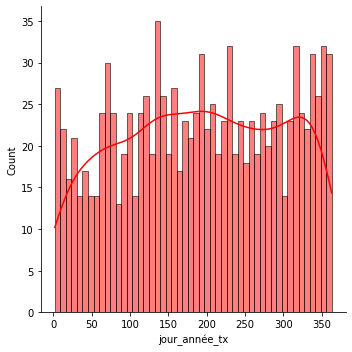

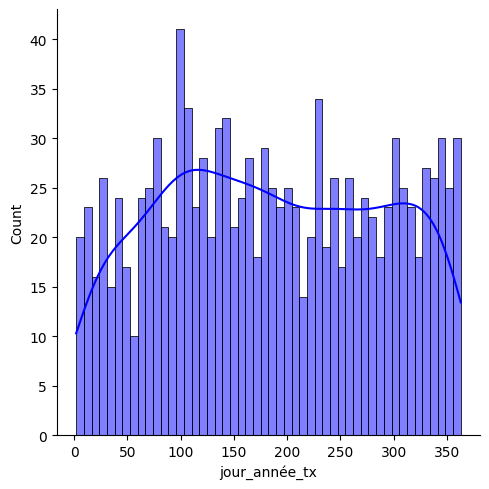

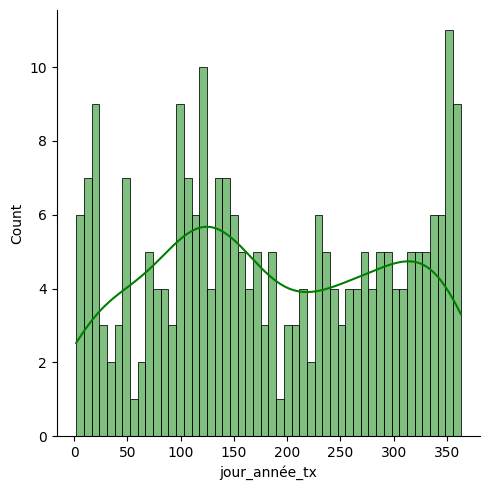

In [14]:
#On regarde dans de manière naïve si le jour de l'année semble avoir un rôle à jouer dans le fait d'être alert ou pas 

sns.displot(df_merge[df_merge['is_alert_solo_A']==1]['jour_année_tx'], kde= True, color='red', bins=50)
sns.displot(df_merge[df_merge['is_alert_solo_B']==1]['jour_année_tx'], kde= True, color='blue', bins=50)
sns.displot(df_merge[df_merge['is_alert_pooled']==1]['jour_année_tx'], kde= True, color='green', bins=50)

##### ==> On observe que de nombreuses tx pooled sont alertées en période de fin d'année Noël et Jour de l'an
==> On peut penser notamment aux cadeaux et aux étrennes

- cela permet de justifier la feature jour de l'année

In [16]:
df_merge.columns

Index(['tx_id', 'tx_amount', 'timestamp', 'tx_type', 'sender_bank_id',
       'sender_first_name', 'sender_last_name', 'sender_country_code',
       'sender_birth_date', 'sender_zip_code', 'receiver_bank_id',
       'receiver_first_name', 'receiver_last_name', 'receiver_country_code',
       'receiver_birth_date', 'receiver_zip_code', 'is_alert_solo_A',
       'nb_tx_sent_A', 'tx_sent_mean_A', 'tx_sent_med_A',
       'nb_tx_sent_alert_solo_A', 'nb_tx_all_A_sender',
       'nb_tx_alert_solo_all_A_sender', 'nb_tx_sent_B', 'tx_sent_mean_B',
       'tx_sent_med_B', 'nb_tx_sent_alert_solo_B', 'nb_tx_all_B_sender',
       'nb_tx_alert_solo_all_B_sender', 'nb_tx_received_A',
       'tx_received_mean_A', 'tx_received_med_A',
       'nb_tx_received_alert_solo_A', 'nb_tx_all_A_receiver',
       'nb_tx_alert_solo_all_A_receiver', 'nb_tx_received_B',
       'tx_received_mean_B', 'tx_received_med_B',
       'nb_tx_received_alert_solo_B', 'nb_tx_all_B_receiver',
       'nb_tx_alert_solo_all_B_receiv

### Sélection des variables 
Voici les variables que l'on enlève dans un premier temps (on les rajoutera peut être après (si on perd trop d'infos (BVO))). 
Plusieurs raisons possible pour la suppression : 
- inutiles pour la prédiction : 
`sender_bank_id`, `receiver_bank_id`, `sender_zip_code`, `receiver_zip_code`
- des variables qu'on peut retrouver grâce aux autres (écarts_tx et tx_amount)
 `tx_sent_med_A`,`tx_sent_med_B`, `tx_received_med_A`, `tx_received_med_B`,
- d'autres variables qu'on peut retrouver grâce aux autres (reliability et nb_tx)
`nb_tx_sent_alert_solo_A`,`nb_tx_sent_alert_solo_B`
`nb_tx_received_alert_solo_A`,`nb_tx_received_alert_solo_B`

In [19]:
df_merge_bis=df_merge[['tx_id', 'tx_amount', 'timestamp', 'tx_type','jour_année_tx', 'jour_mois_tx',
                       
       'sender_first_name', 'sender_last_name', 'sender_country_code','sender_birth_date',
       'receiver_first_name', 'receiver_last_name', 'receiver_country_code','receiver_birth_date',
                       
       'tx_sent_mean_A','tx_sent_mean_B','tx_received_mean_A','tx_received_mean_B',
                       
       'nb_tx_sent_A', 'nb_tx_all_A_sender',
       'nb_tx_sent_B', 'nb_tx_all_B_sender',
                       
       'nb_tx_received_A','nb_tx_all_A_receiver',
       'nb_tx_received_B','nb_tx_all_B_receiver',
                       
       'nb_tx_alert_solo_all_A_sender', 'nb_tx_alert_solo_all_B_sender',
       'nb_tx_alert_solo_all_A_receiver','nb_tx_alert_solo_all_B_receiver',
                       
       'reliability_receiver_A','reliability_receiver_B', 
       'reliability_sender_A','reliability_sender_B',
                       
       'ecarts_tx_received_A', 'ecarts_tx_received_B', 
       'ecarts_tx_sent_A','ecarts_tx_sent_B',  
                       
       'is_alert_solo_A','is_alert_solo_B',
       'is_alert_pooled']].copy()

## Preprocessing 

## Modélisation 

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import RidgeCV
from sklearn import metrics

In [18]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X=df_merge.drop(['is'],axis=1)
y= df_4['revenue']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1 )
X_t=X_train.copy()